# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [ ]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

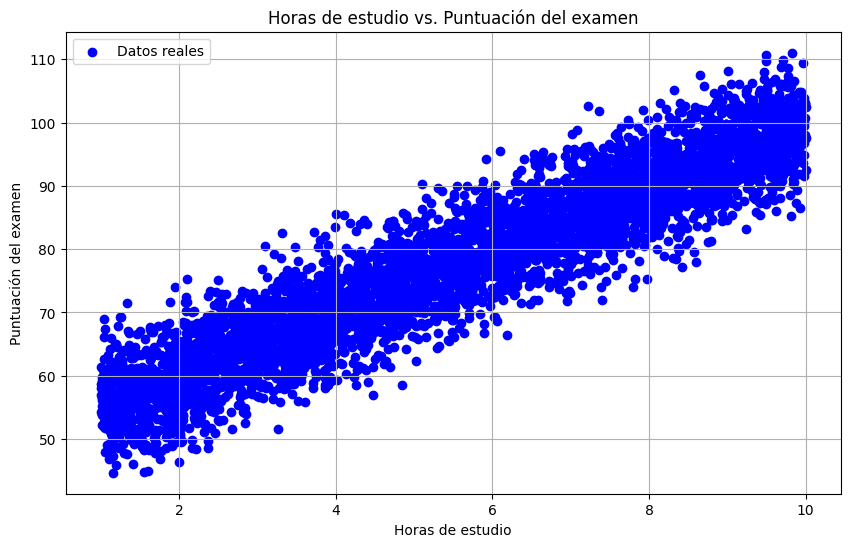

In [ ]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# A COMPLETAR

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [ ]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
  cost = np.mean((y_true - y_pred) ** 2)  # MSE = (1/n) * Σ (y_true - y_pred)²
    # A COMPLETAR
  return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # Convertir listas en arrays de NumPy y asegurar forma bidimensional
    X_train = np.array(X_train).reshape(-1, 1)
    X_val = np.array(X_val).reshape(-1, 1)

# Obtener número de muestras y características
    n_samples, n_features = X_train.shape



    # A COMPLETAR

    # 1. Inicializar los coeficientes (pesos) w y b
    w = np.zeros(n_features)
    b = 0

    # 2️⃣ Listas para almacenar la pérdida en cada época
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    # 2. bucle que itere por epoch
    for epoch in range(epochs):
        #  3. Calcular y_pred del conjunto de entrenamiento por epoch
        y_pred_train = np.dot(X_train, w) + b

        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # 5. Calcular los gradientes para los pesos w y b
        error = y_pred_train - y_train
        dw = (-2 / n_samples) * np.dot(X_train.T, error)  # gradiente de b es la derivada de la función de coste con respecto a b: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta]

        db = (-2 / n_samples) * np.sum(error)     # gradiente de w es la derivada de la función de coste con respecto a w: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta] * [carácterísticas de las muestras]

        # 6. Actualizar los pesos w y b (que será el valor actual del peso menos el learning rate por el gradiente del peso)
        w -= lr * dw
        b -= lr * db

        # 7. Calcular y_pred del conjunto de validación por epoch
        y_pred_val = np.dot(X_val, w) + b

        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]

        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)


          #  🔹 Imprimir cada 100 épocas para ver el progreso
        if epoch % 100 == 0:
            print(f"Época {epoch}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")






    return w, b, train_loss_per_epoch, val_loss_per_epoch

In [ ]:
# Hiperparámetros
lr = 0.001# A COMPLETAR
epochs = 100 # A COMPLETAR

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

Época 0: Train Loss=6149.6132, Val Loss=7053.9292


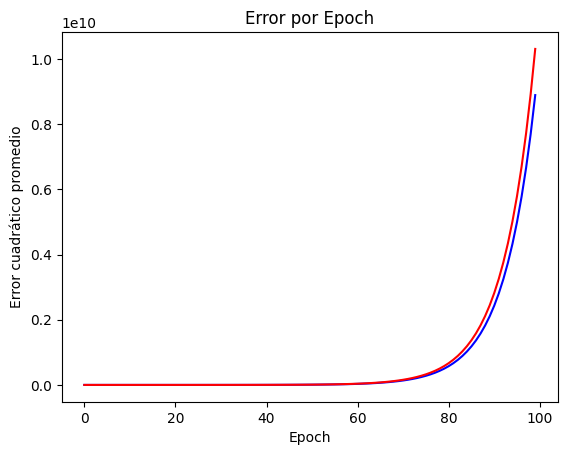

In [ ]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

In [ ]:
X_test = X_test.reshape(-1, 1)  # Asegura que tenga forma (1000, 1) en lugar de (1000,)


In [ ]:
w = np.array(w).reshape(-1)  # Asegurar que `w` sea un vector 1D con la misma cantidad de características


In [ ]:
print("Forma de X_test:", X_test.shape)  # Debe ser (1000, 1)
print("Forma de w:", w.shape)  # Debe ser (1,)


Forma de X_test: (1000, 1)
Forma de w: (1,)


Costo del modelo: 10516245818.341902


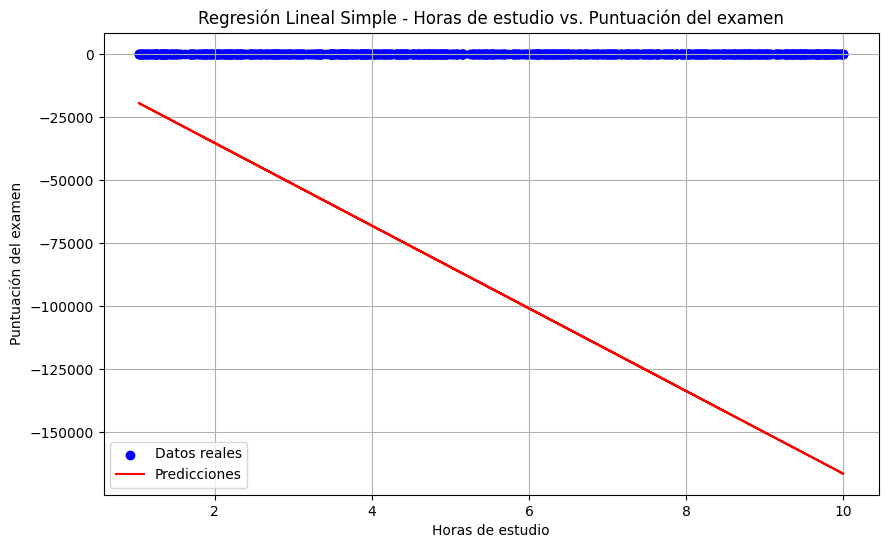

In [ ]:
# Realizar predicciones en test
y_pred = np.dot(X_test, w) + b # A COMPLETAR

# Calcular el costo
cost = cost_function(y_test, y_pred)# A COMPLETAR

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 10516245818.341902
MAE en el conjunto de test: 92875.59405527597
R^2 en el conjunto de test: -52760488.34419551
MAPE en el conjunto de test: 113649.35580494696


## Implementación de la regresión lineal usando sklearn

In [ ]:
# Convertir X_train y X_test a 2D si tienen una sola característica
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
# Crear el modelo de regresión lineal con sklearn
# A COMPLETAR
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
# A COMPLETAR
model.fit(X_train, y_train)

LinearRegression()

Costo del modelo: 25.249637383330832


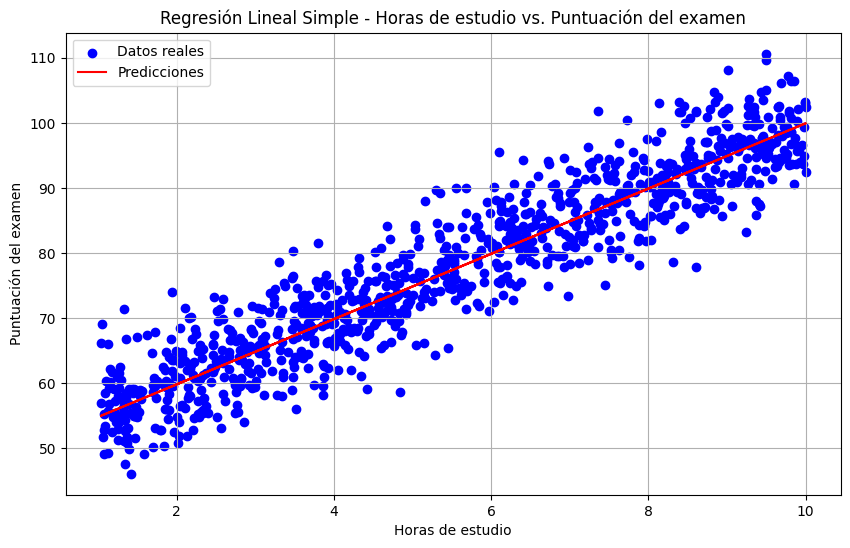

In [ ]:
# Realizar predicciones en test
y_pred = model.predict(X_test)# A COMPLETAR

# Calcular el costo
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, y_pred) # A COMPLETAR

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R^2
mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))  # Error porcentual absoluto medio (MAPE)

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

MSE en el conjunto de entrenamiento: 25.249637383330832
MAE en el conjunto de entrenamiento: 3.9544897494040634
R^2 en el conjunto de entrenamiento: 0.8733214069811396
MAPE en el conjunto de entrenamiento: 5.257659436831548


## Comparación de parámetros obtenidos

In [ ]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: -2466.9604011060405
Coeficiente de pendiente (w) - Manual: [-16391.65612577]
Coeficiente de intercepción (b) - Scikit-learn: 49.793769346749855
Coeficiente de pendiente (w) - Scikit-learn: 5.01401554246229
